#Problem Statement :-
In numerous nations, cardiovascular disease ranks as the primary cause of mortality. Physicians commonly rely on contemporary clinical assessments and their prior diagnostic encounters with patients exhibiting analogous symptoms to diagnose cardiovascular conditions. Timely identification, early intervention, and continuous monitoring are essential for patients afflicted with heart disease. Consequently, to cater to these imperative patient requirements, machine learning algorithms have been employed for the diagnosis and prediction of heart diseases.

## Objective - To build the Machine Learning model to predict the cardiovascular diesase.

About the Dataset :- It has 14 columns - 13 features and 1 target

1. Age - Age of  patient
2. Sex - Gender
3. CP - Chest pain type
4. Trestbps - Resting blood pressure
5. Chol - Serum cholesterol
6. Fbs - Fasting blood sugar
7. Resteg - Resting electrographic results
8. Talach - Maximum heart rate achieved
9. Exang -  Exercise induce angina
10. Oldpeak - ST depression induced by exercise relative
to rest

11. Slope  - The slope of the peak exercise ST segment
12. CA - Number of major vessels coloured by
fuoroscopy
13. Thal - Thallium heart scan
14. Target - Diagnosis of heart disease

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [77]:
data = pd.read_csv('heart.csv')

In [78]:
data.shape

(303, 14)

In [79]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [80]:
data.duplicated().sum()

1

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [83]:
col_list = data.columns

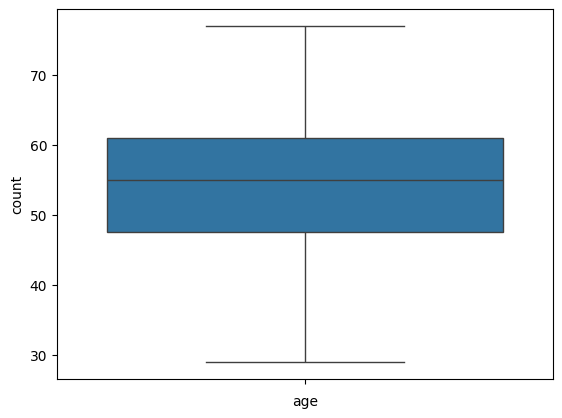

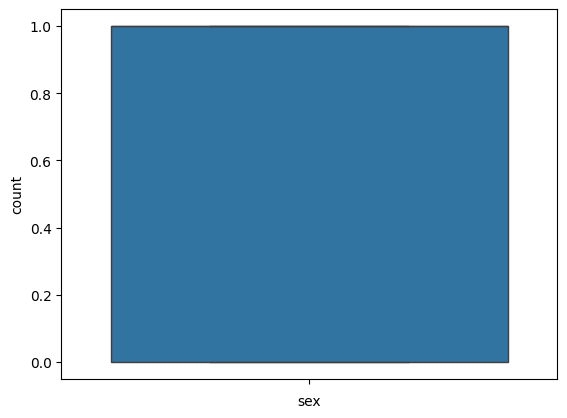

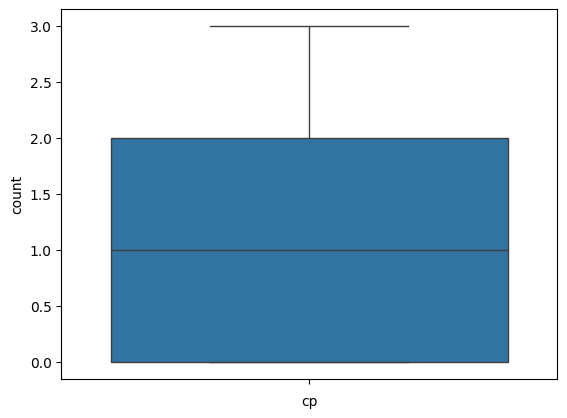

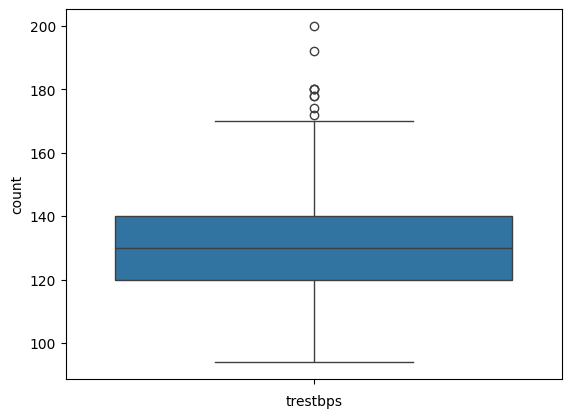

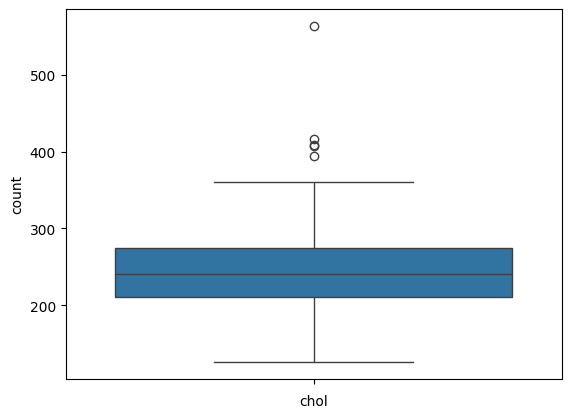

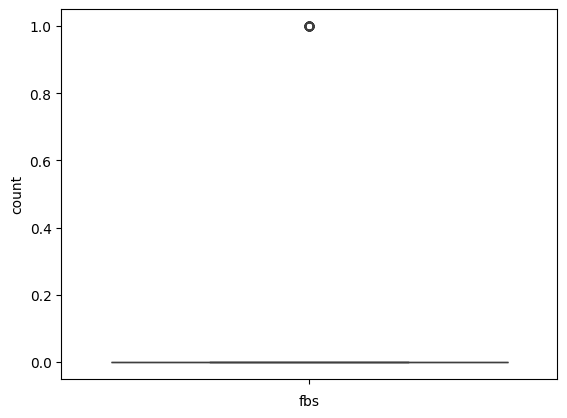

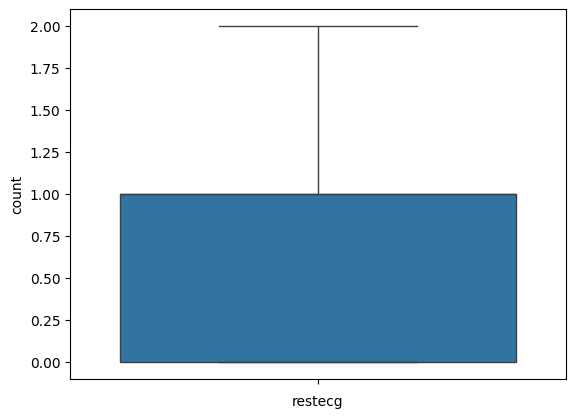

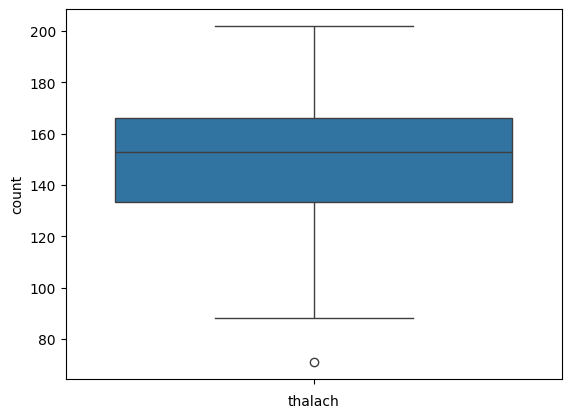

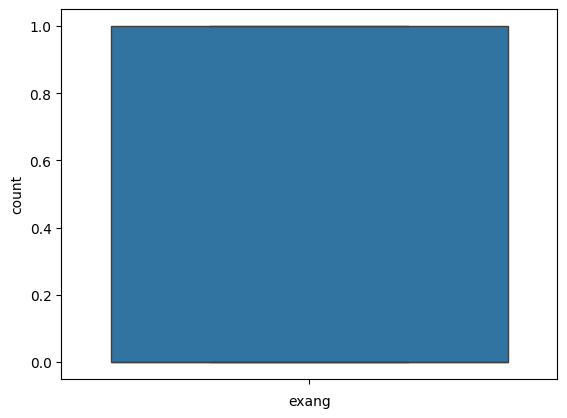

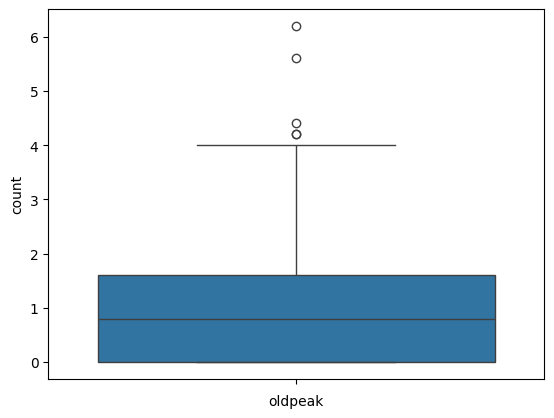

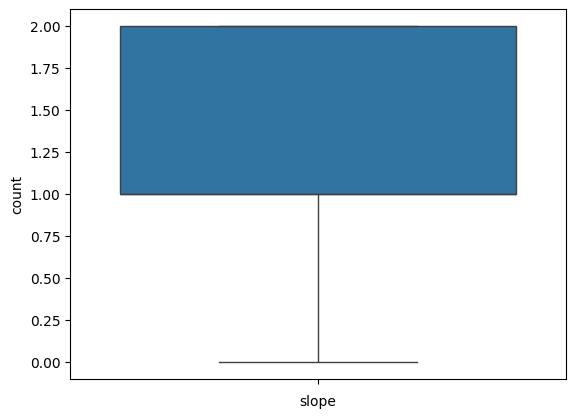

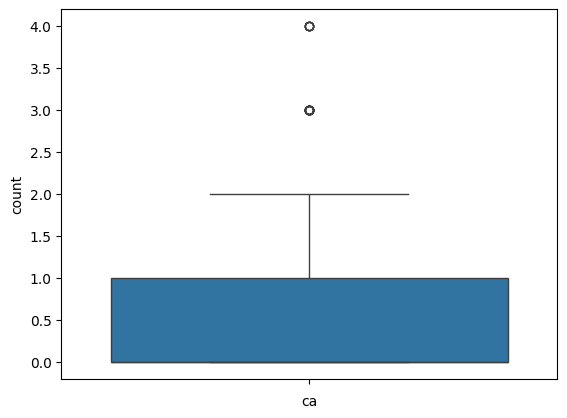

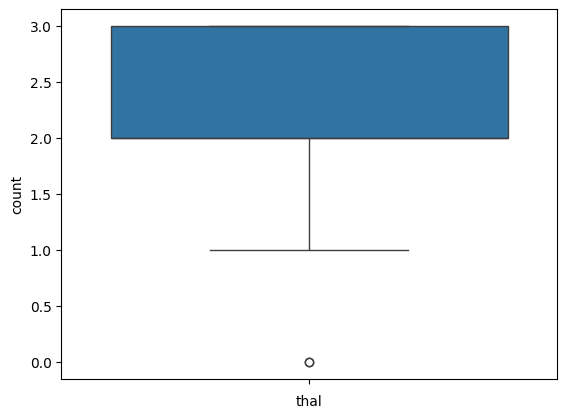

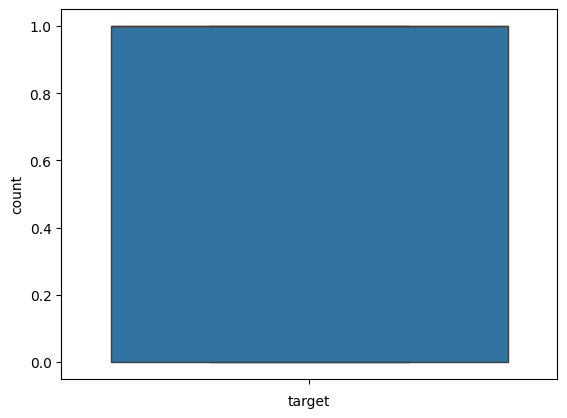

In [84]:
for i in col_list:
    if (data[i].dtypes == 'int64' or data[i].dtypes == 'float64'):
      sns.boxplot(data[i])
      plt.xlabel(i)
      plt.ylabel('count')
      plt.show()

In [85]:
out_col = ["trestbps","chol","fbs","thalach","oldpeak","ca","thal"]

In [86]:
for col in out_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    data = data[(data[col]<=upper) & (data[col]>=lower)]

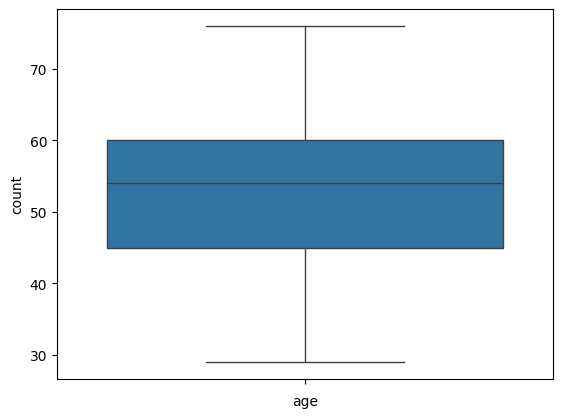

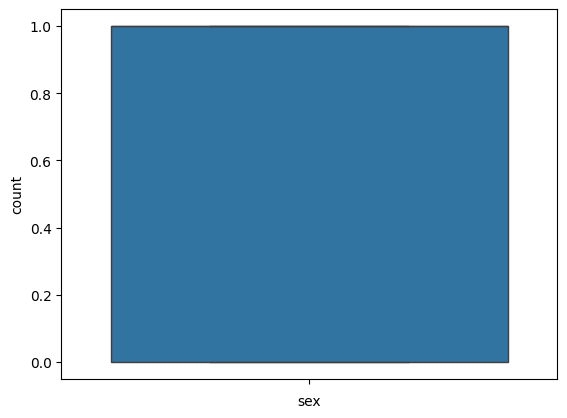

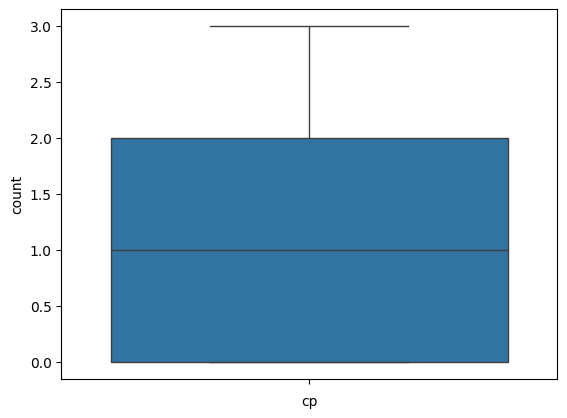

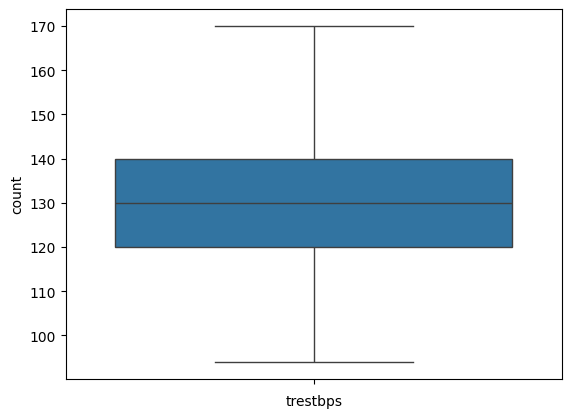

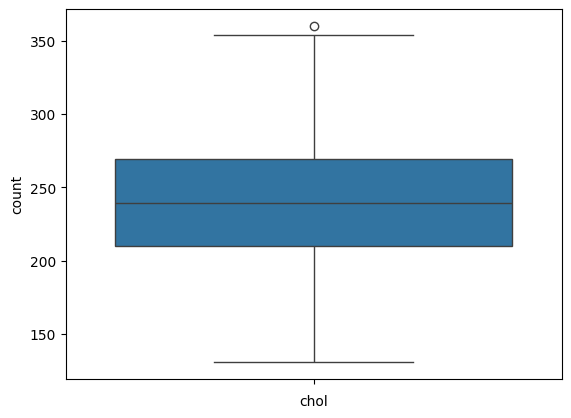

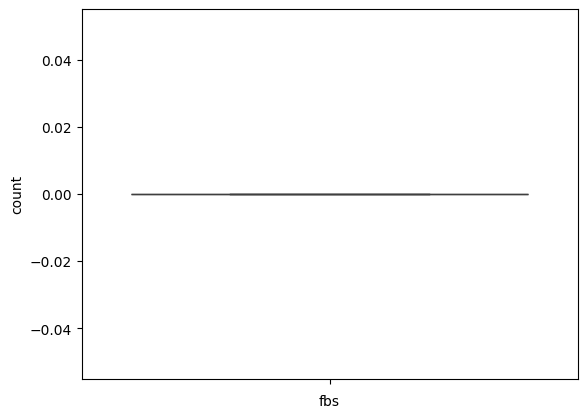

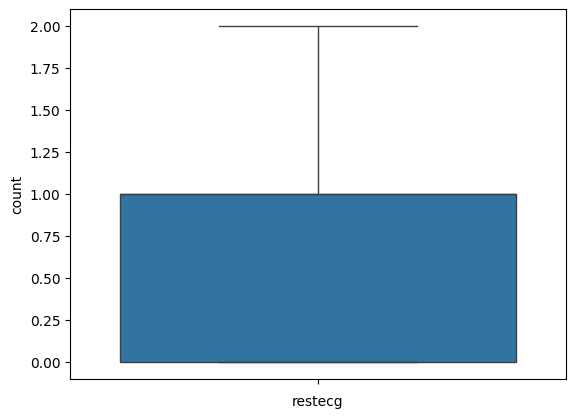

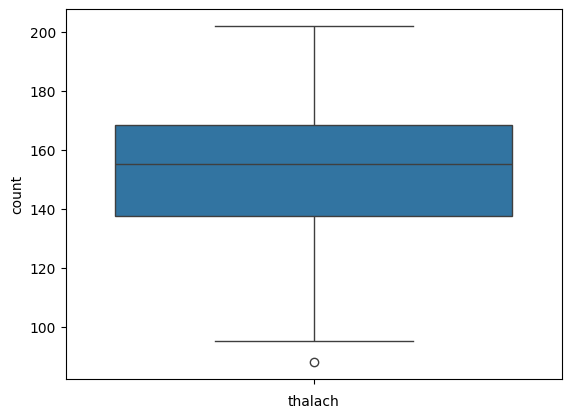

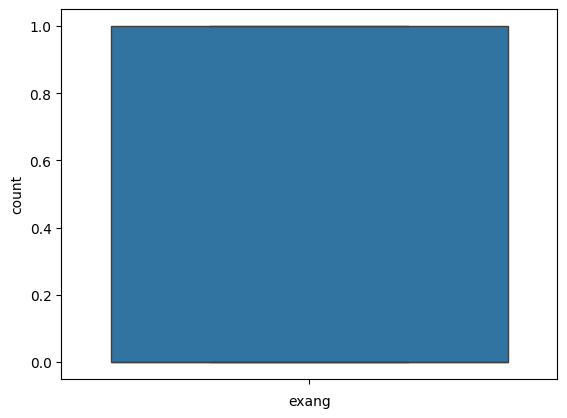

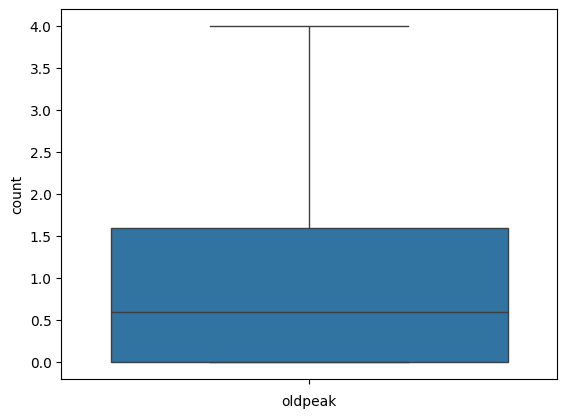

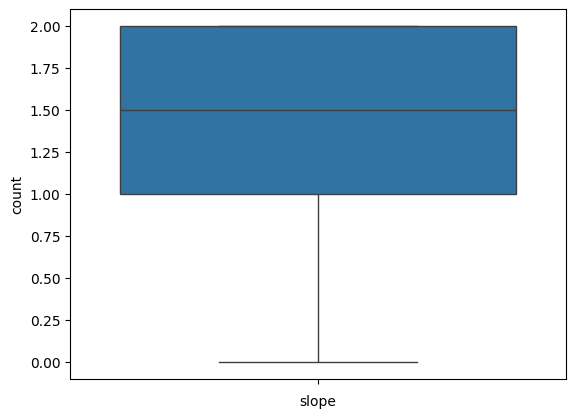

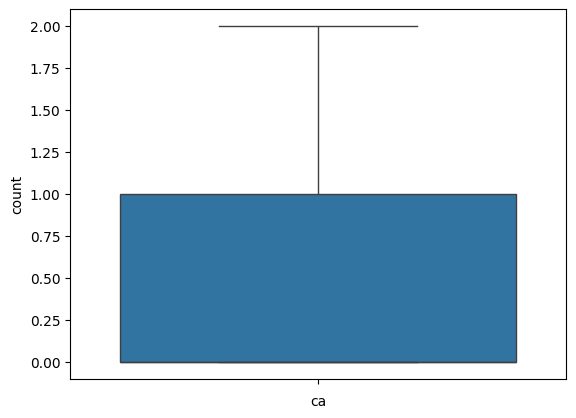

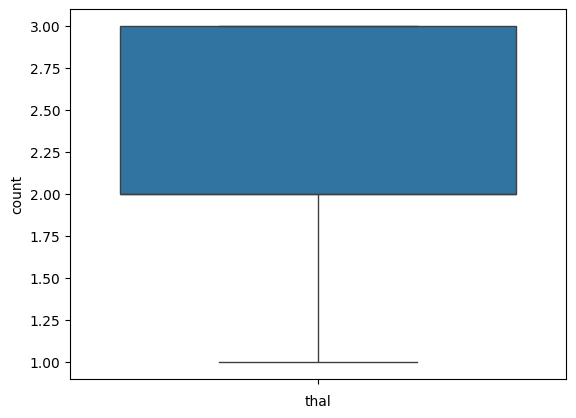

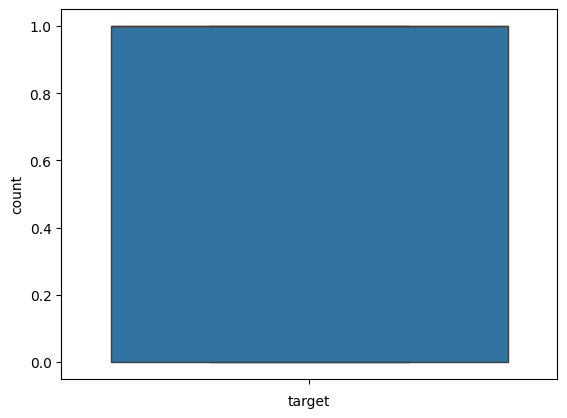

In [87]:
for i in col_list:
    if (data[i].dtypes == 'int64' or data[i].dtypes == 'float64'):
      sns.boxplot(data[i])
      plt.xlabel(i)
      plt.ylabel('count')
      plt.show()

(array([ 1.,  9., 30., 29., 32., 44., 37., 31., 13.,  2.]),
 array([29. , 33.7, 38.4, 43.1, 47.8, 52.5, 57.2, 61.9, 66.6, 71.3, 76. ]),
 <BarContainer object of 10 artists>)

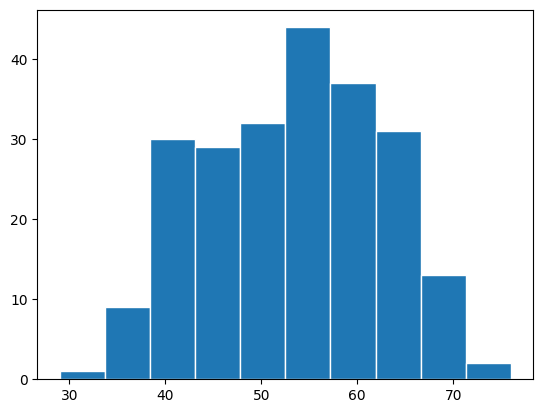

In [88]:
plt.hist(data["age"],edgecolor="white")


(array([108.,   0.,   0.,  42.,   0.,   0.,  61.,   0.,   0.,  17.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

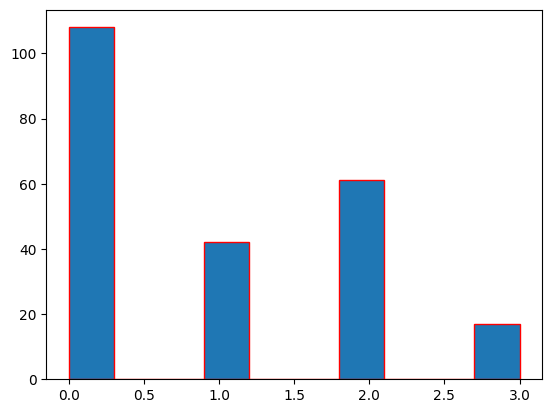

In [89]:
plt.hist(data["cp"],edgecolor="red")

<Axes: xlabel='target', ylabel='count'>

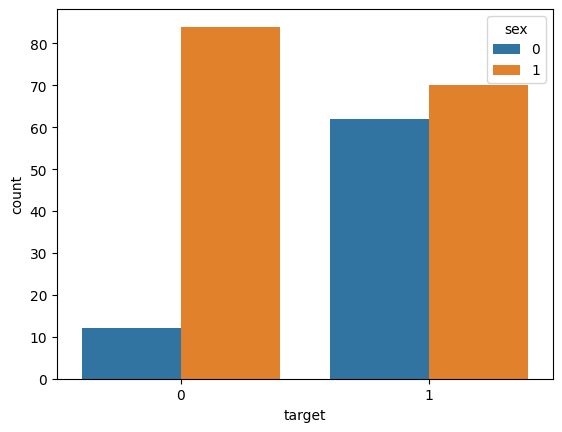

In [90]:
sns.countplot(data = data,x = "target",hue = "sex")

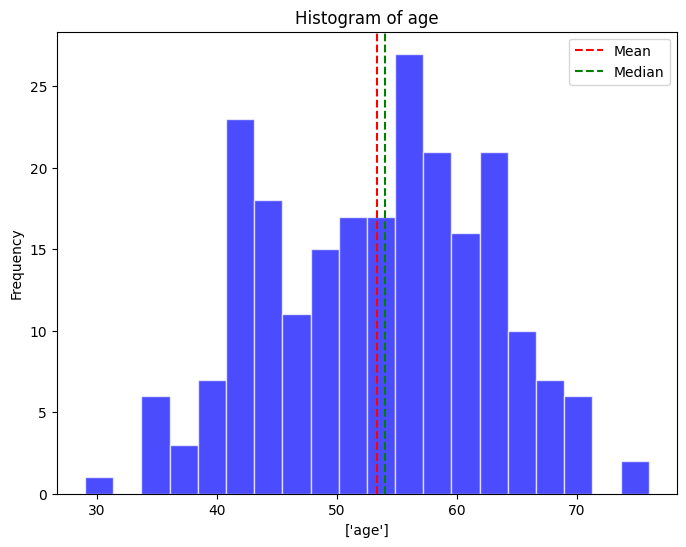

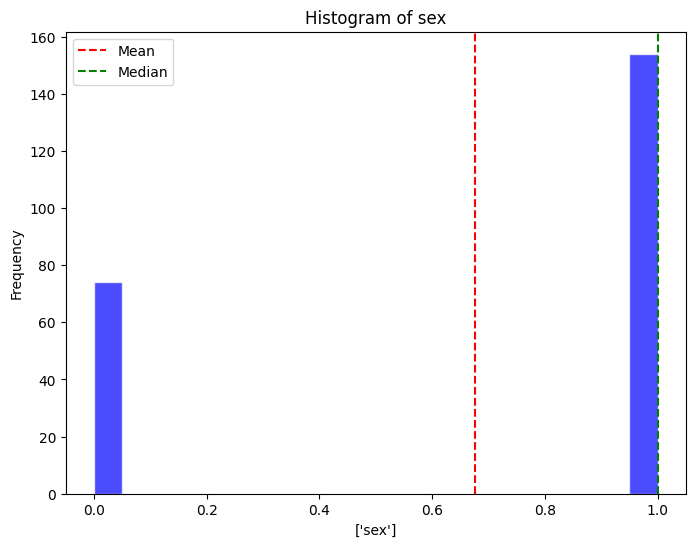

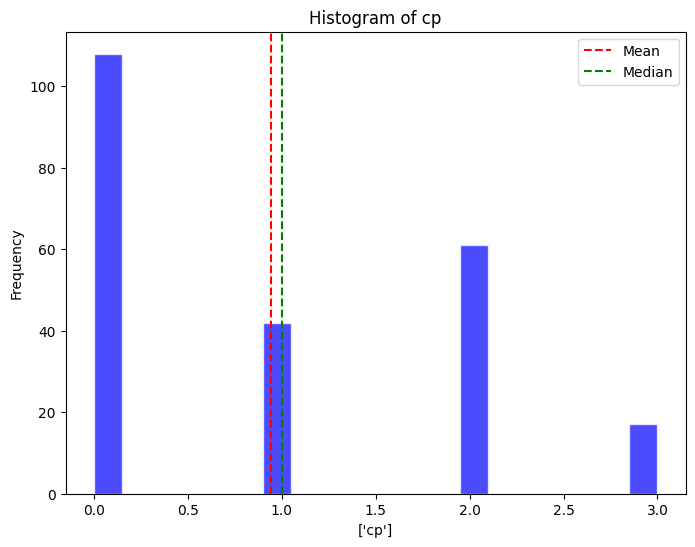

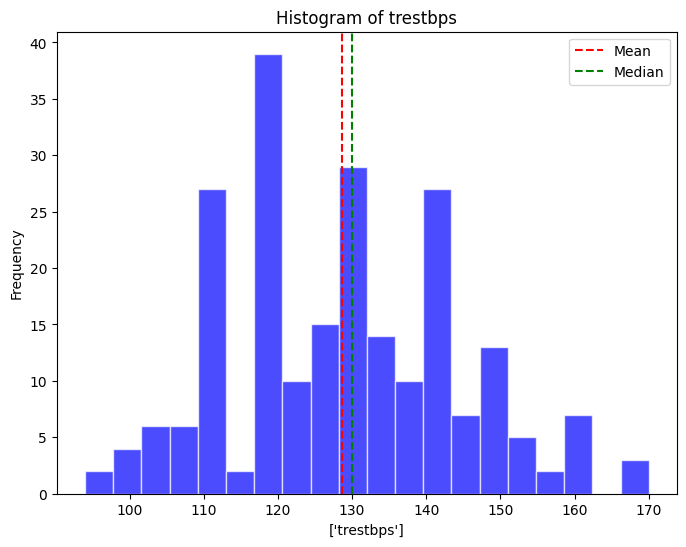

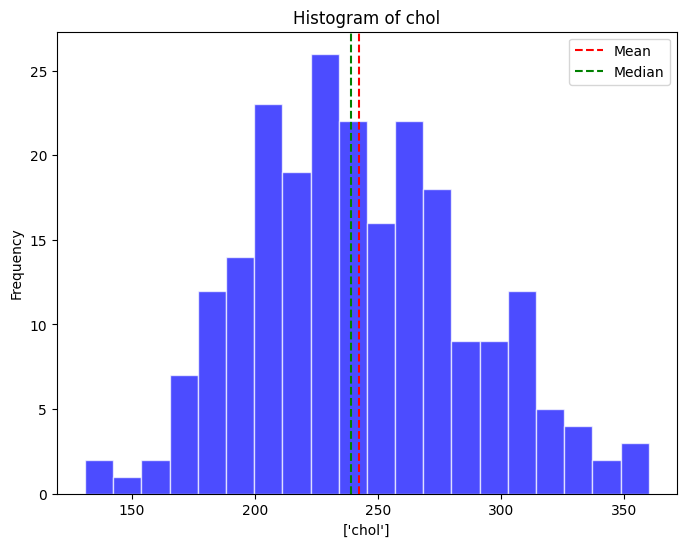

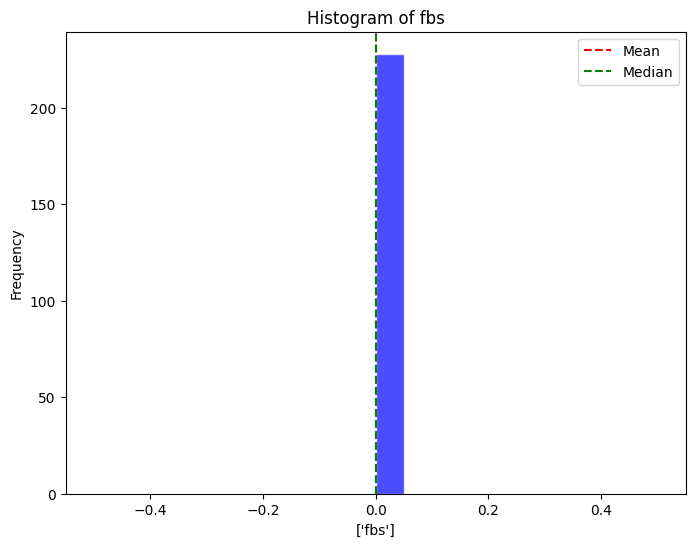

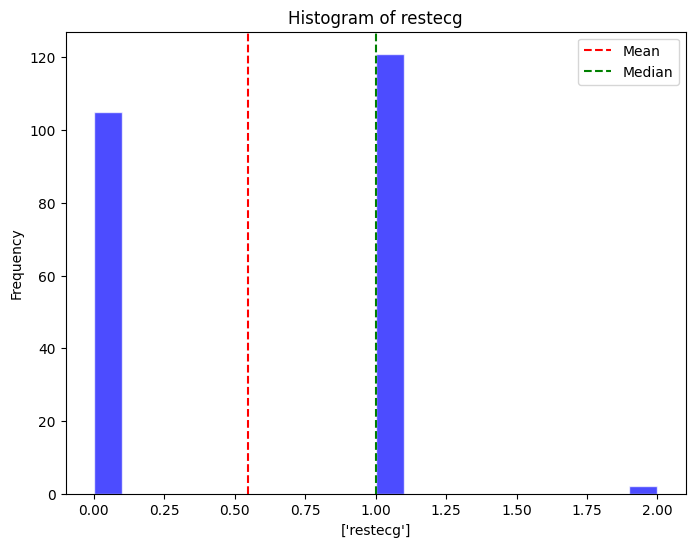

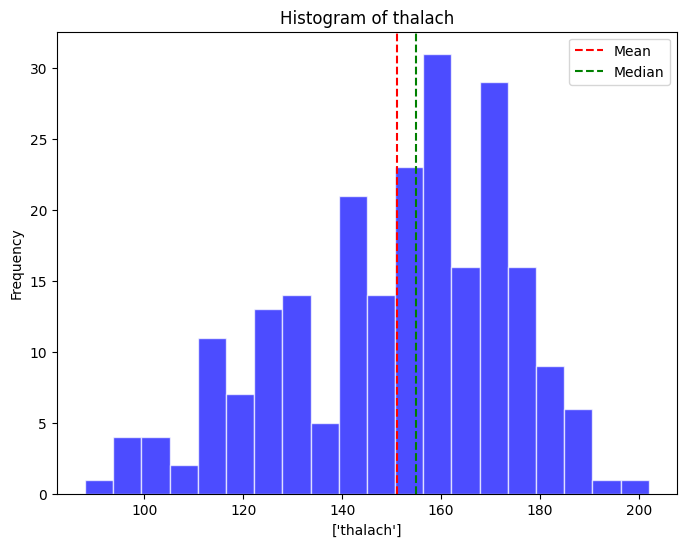

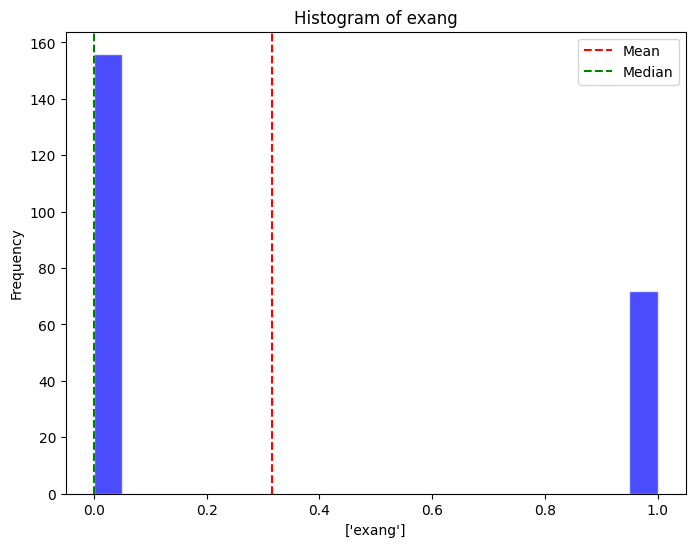

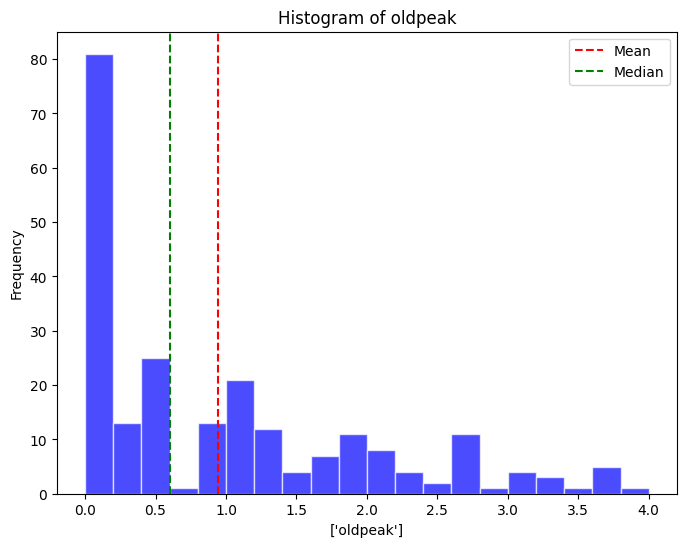

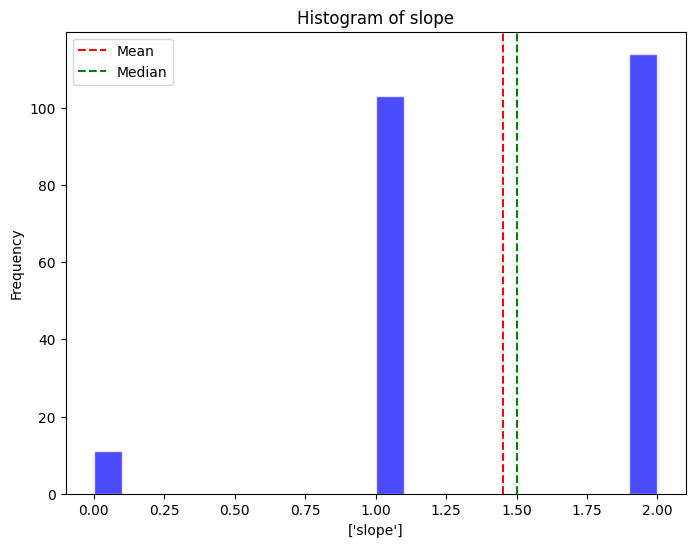

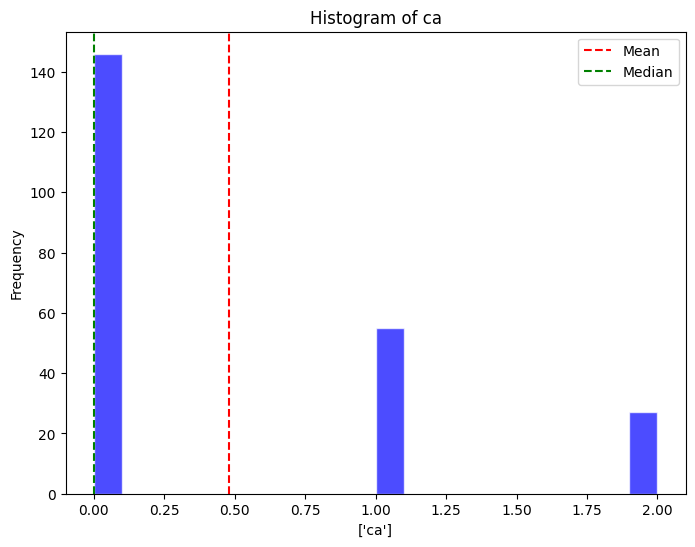

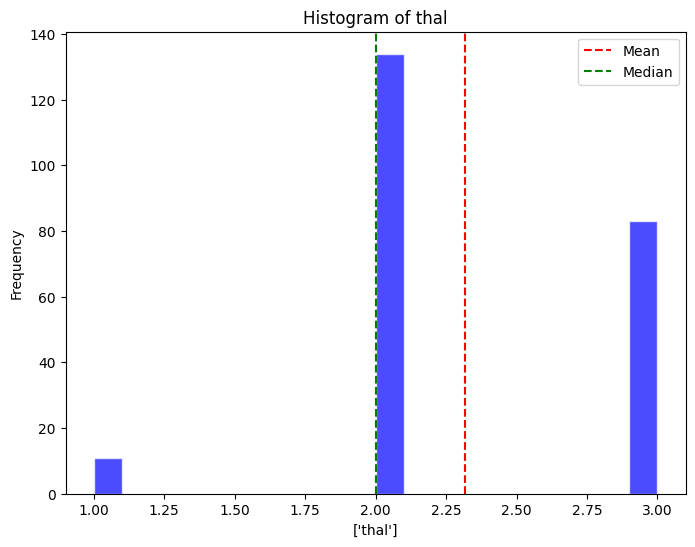

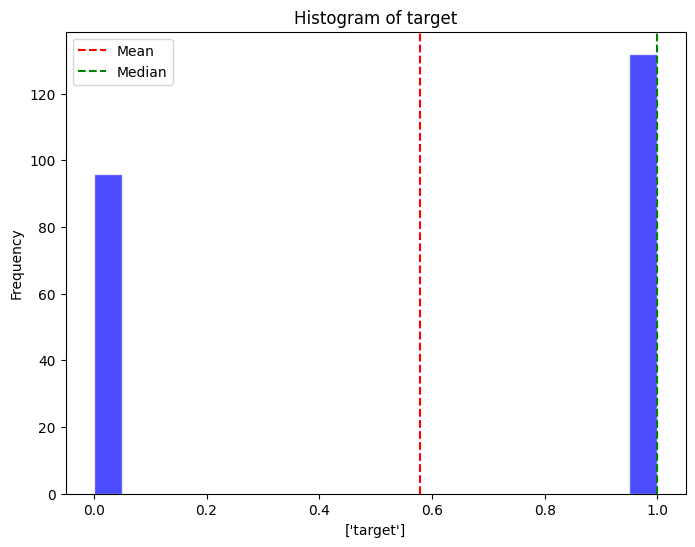

In [91]:
for i in col_list:
    plt.figure(figsize = (8,6))
    plt.hist(data[i],bins = 20, alpha = 0.7,color = 'blue', edgecolor = 'white')
    plt.axvline(data[i].mean(),color = 'red', linestyle = 'dashed',linewidth = 1.5, label = 'Mean')
    plt.axvline(data[i].median(), color = 'green',linestyle = 'dashed', linewidth = 1.5, label ='Median')
    plt.xlabel([i])
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')
    plt.legend()
    plt.show()

In [92]:
X = data.iloc[:,:-1]
y = data['target']

In [93]:
from sklearn.model_selection import train_test_split



In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 50)

In [96]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3


In [97]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2


In [98]:
y_train

202    0
109    1
302    0
218    0
124    1
      ..
41     1
139    1
175    0
298    0
227    0
Name: target, Length: 159, dtype: int64

In [99]:
y_test

94     1
107    1
117    1
156    1
244    0
      ..
211    0
91     1
187    0
73     1
201    0
Name: target, Length: 69, dtype: int64

### Decision Tree ClassifIer

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt_model = DecisionTreeClassifier()

In [102]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [103]:
dt_pred = dt_model.predict(X_test)

In [104]:
dt_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0])

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(dt_pred,y_test)

0.855072463768116

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dt_pred,y_test)

array([[26,  6],
       [ 4, 33]])

### Hypertunning Parameter

In [107]:
final_model = DecisionTreeClassifier(max_depth=8)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)*100
acc_score

85.5072463768116

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[26,  4],
       [ 6, 33]])

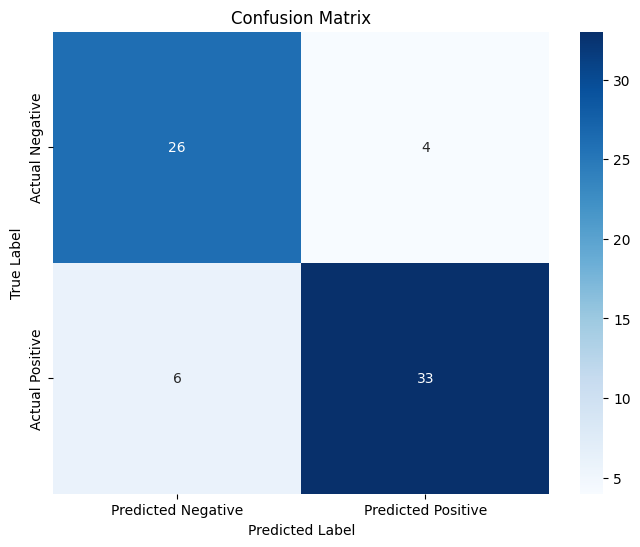

In [109]:
cm = confusion_matrix(y_test,y_pred)

# Plot confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision score by using decision tree:", precision)
print("Recall score by using  decision tree:", recall)
print("F1 Score by using  decision tree:", f1)

Precision score by using decision tree: 0.8918918918918919
Recall score by using  decision tree: 0.8461538461538461
F1 Score by using  decision tree: 0.868421052631579


[Text(0.6398026315789473, 0.9375, 'x[12] <= 2.5\ngini = 0.486\nsamples = 159\nvalue = [66, 93]'),
 Text(0.41118421052631576, 0.8125, 'x[11] <= 0.5\ngini = 0.338\nsamples = 102\nvalue = [22, 80]'),
 Text(0.26973684210526316, 0.6875, 'x[8] <= 0.5\ngini = 0.193\nsamples = 74\nvalue = [8, 66]'),
 Text(0.19736842105263158, 0.5625, 'x[4] <= 327.5\ngini = 0.116\nsamples = 65\nvalue = [4, 61]'),
 Text(0.13157894736842105, 0.4375, 'x[9] <= 1.7\ngini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(0.07894736842105263, 0.3125, 'x[3] <= 109.0\ngini = 0.034\nsamples = 57\nvalue = [1, 56]'),
 Text(0.05263157894736842, 0.1875, 'x[1] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.02631578947368421, 0.0625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.07894736842105263, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10526315789473684, 0.1875, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]'),
 Text(0.18421052631578946, 0.3125, 'x[6] <= 0.5\ngini = 0.444\nsamples = 3\nvalue 

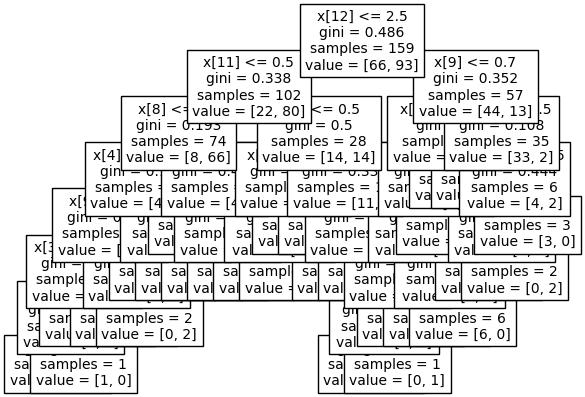

In [111]:
from sklearn import tree
tree.plot_tree(final_model,fontsize=10)

###Model Building by Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rc = RandomForestClassifier()

In [114]:
rc.fit(X_train,y_train)

RandomForestClassifier()

In [115]:
X_test_r = X_test
y_test_r = y_test
X_train_r = X_train

In [116]:
y_pred_r = rc.predict(X_test_r)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_test_r,y_pred_r)

0.8840579710144928

In [123]:
Accuracy_of_model = accuracy_score(y_test_r,y_pred_r)*100

In [125]:
print("Accucary of the model:", Accuracy_of_model)

Accucary of the model: 88.40579710144928


In [119]:
confusion_matrix(y_pred_r,y_test_r)

array([[28,  6],
       [ 2, 33]])

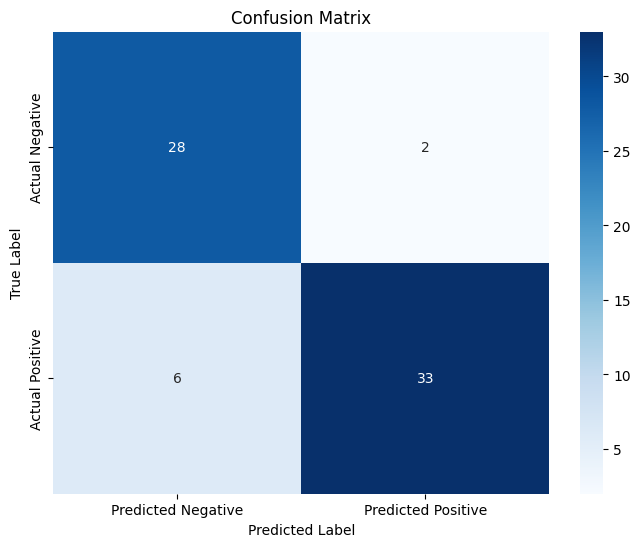

In [120]:
cm = confusion_matrix(y_test_r,y_pred_r)

# Plot confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [121]:
precision = precision_score(y_test_r, y_pred_r)
recall = recall_score(y_test_r, y_pred_r)
f1 = f1_score(y_test_r, y_pred_r)

print("Precision score by using Random Forest:", precision)
print("Recall score by using  Random Forest:", recall)
print("F1 Score by using Random Forest:", f1)

Precision score by using Random Forest: 0.9428571428571428
Recall score by using  Random Forest: 0.8461538461538461
F1 Score by using Random Forest: 0.8918918918918919


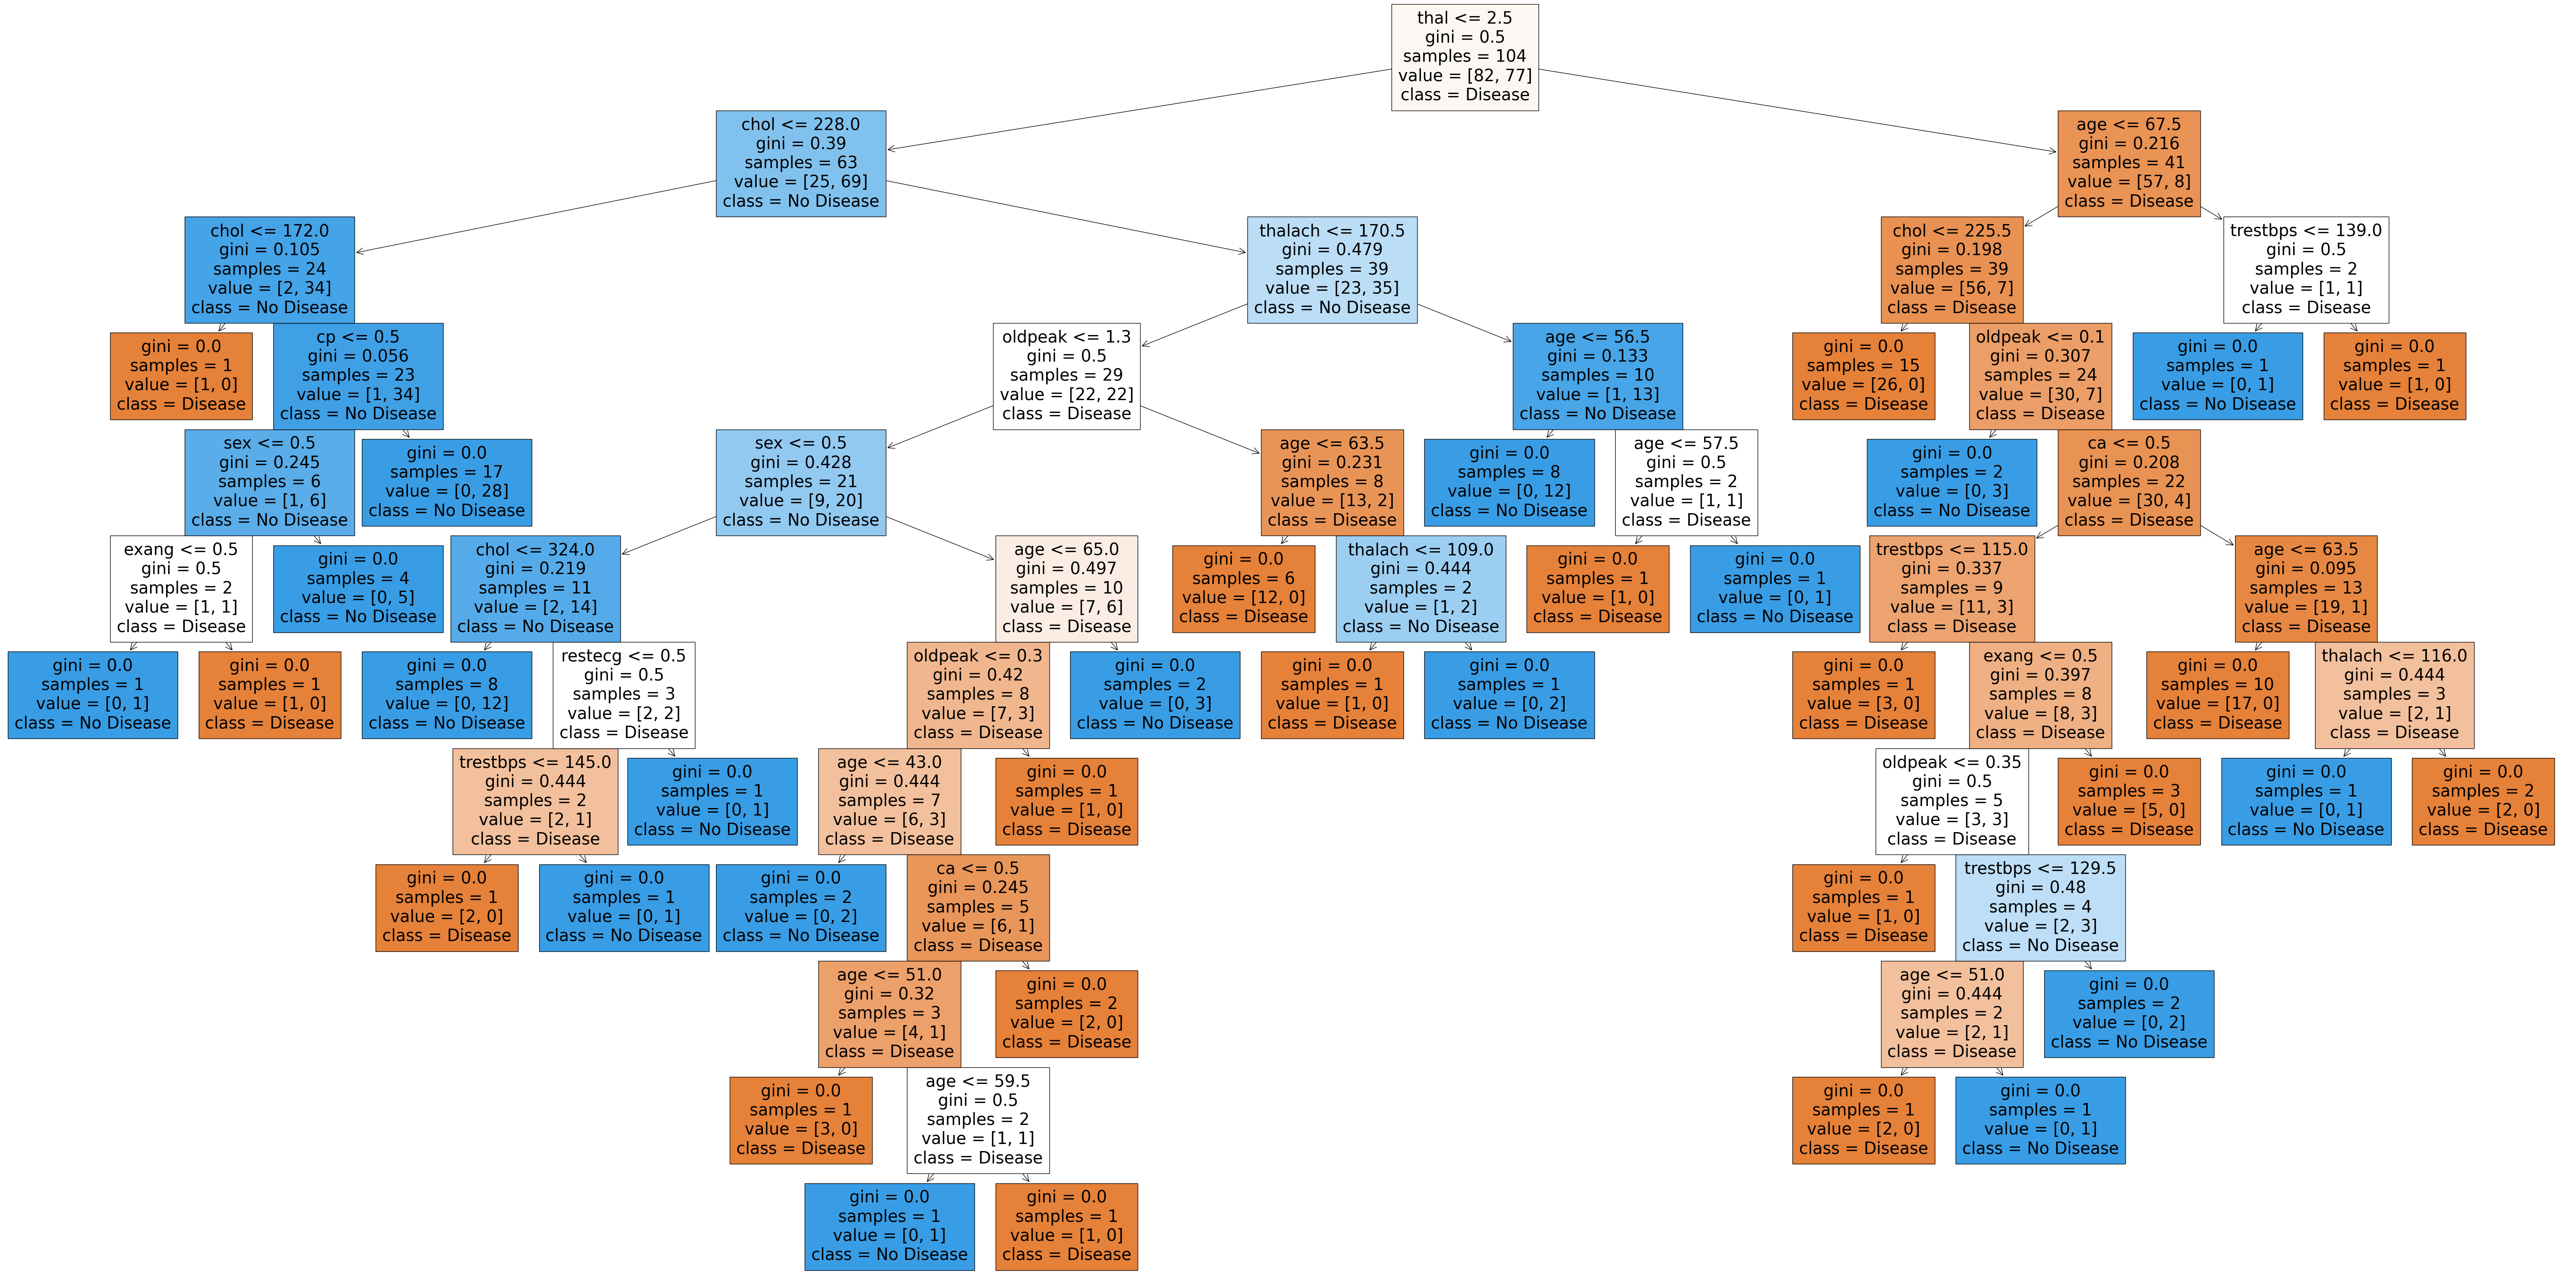

In [122]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rc.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);
